In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns

sns.set_theme()

In [38]:
from pathlib import Path




In [39]:
def makePlots(model, lr, graphType):
    temp = []
    
    #get directories of specifies files
    directory_in_str = os.getcwd() + '/ResultsData/' + graphType
    pathlist = Path(directory_in_str).glob('**/*.csv')
    for path in pathlist:
        path_in_str = str(path)
    
        if model and lr in path_in_str:
            print(path_in_str)
            temp.append(path_in_str)
    
    #plot graphs
    plt.figure(figsize=(10,10))
    for i in temp:
        _, fileName = os.path.split(i)
        #split filename
        ModelName, opt, lr, acc = fileName.split('-')
        temp = acc.split('.')
        acc = temp[0] + "." + temp[1]
    
        df = pd.read_csv(i, index_col=0)
        plt.plot(df, label=ModelName + ' ' + opt)
        plt.xlabel('Epochs')
        plt.title(model +' '+ lr + " " + acc + '%')
        if 'loss' in graphType:
            plt.ylabel('Loss')
        else:
            plt.ylabel("Accuracy")
        plt.legend()

    return 

# FCN plots


/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-Neserov-0.005-68.21.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-MaSS-0.005-87.33.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-Adam-0.005-48.71.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCNBatchNorm-Neserov-0.005-96.71.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/CNN-Adam-0.001-80.19.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-SGD-0.005-85.95.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-SGD-0.005-84.28.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Dee

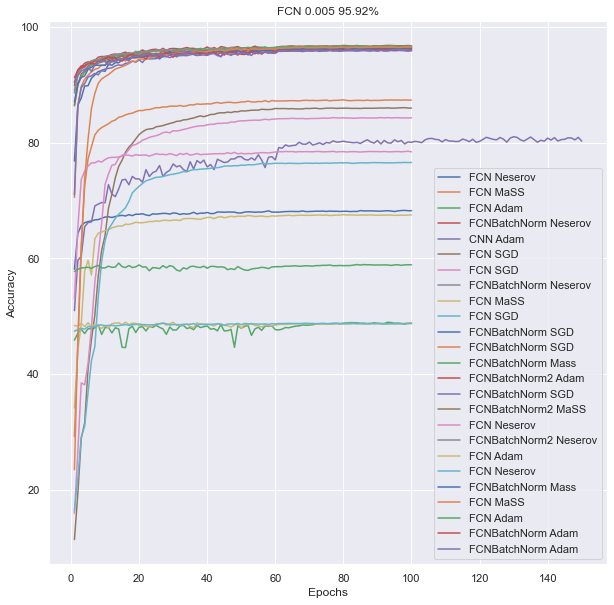

In [40]:
model = 'FCN'
lr = '00'
graphType = 'validacc'






# CNN plots


/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validloss/CNNBatchNorm-MaSS-0.01-82.73 (1).csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validloss/CNN-Nesterov-0.01-82.6.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validloss/CNN-SGD-0.01-78.68.csv


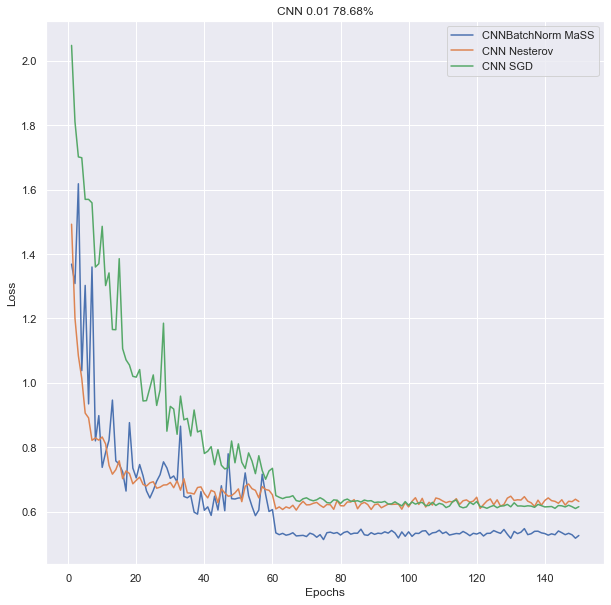

In [44]:
model = 'CNN'
lr = '0.01'
graphType = 'validloss'



makePlots(model, lr, graphType)


# ResNet plots

/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-Neserov-0.005-68.21.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-MaSS-0.005-87.33.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-Adam-0.005-48.71.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCNBatchNorm-Neserov-0.005-96.71.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/CNN-Adam-0.001-80.19.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-SGD-0.005-85.95.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Deep Learning/MaSS-optimiser/General/Code/ResultsData/validacc/FCN-SGD-0.005-84.28.csv
/Users/ahmadkida/Documents/SCHOOL/Fourth Year/Dee

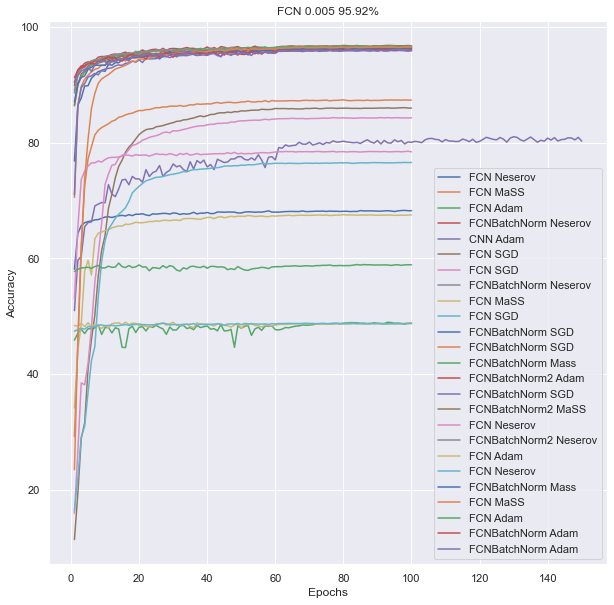

In [42]:
model = 'FCN'
lr = '00'
graphType = 'validacc'

